In [17]:
#!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 24.3MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.3MB/s]


In [16]:
#!mkdir -p ~/.kaggle
#!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [19]:
#!unzip /content/dogs-vs-cats.zip -d /content/drive/MyDrive/dogs-vs-cats/

In [40]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential,layers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

In [24]:
#generators
train_ds=keras.utils.image_dataset_from_directory(directory='/content/drive/MyDrive/dogs-vs-cats/train',
                                         labels='inferred',
                                         label_mode='int',
                                         batch_size=32,
                                         image_size=(256,256)
                                         )

validation_ds=keras.utils.image_dataset_from_directory(directory='/content/drive/MyDrive/dogs-vs-cats/test',
                                         labels='inferred',
                                         label_mode='int',
                                         batch_size=32,
                                         image_size=(256,256)
                                         )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [25]:
#normalize
def process(image,label):
  tf.cast(image/255,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [41]:
#create CNN model
model=Sequential()
image_height=256
image_width=256
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))


In [42]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 batch_normalization (Batch  (None, 127, 127, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                      

In [45]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 83s 125ms/step - loss: 0.2301 - accuracy: 0.9065 - val_loss: 0.4522 - val_accuracy: 0.7966
Epoch 2/10
625/625 [==============================] - 70s 112ms/step - loss: 0.1505 - accuracy: 0.9441 - val_loss: 0.5970 - val_accuracy: 0.8140
Epoch 3/10
625/625 [==============================] - 70s 111ms/step - loss: 0.1037 - accuracy: 0.9607 - val_loss: 0.5618 - val_accuracy: 0.8200
Epoch 4/10
625/625 [==============================] - 71s 112ms/step - loss: 0.0743 - accuracy: 0.9736 - val_loss: 0.5415 - val_accuracy: 0.8148
Epoch 5/10
625/625 [==============================] - 71s 113ms/step - loss: 0.0707 - accuracy: 0.9761 - val_loss: 0.7155 - val_accuracy: 0.8370
Epoch 6/10
625/625 [==============================] - 74s 118ms/step - loss: 0.0612 - accuracy: 0.9794 - val_loss: 0.6939 - val_accuracy: 0.8248
Epoch 7/10
625/625 [==============================] - 81s 129ms/step - loss: 0.0427 - accuracy: 0.9861 - val_loss: 0.6517 - val_ac

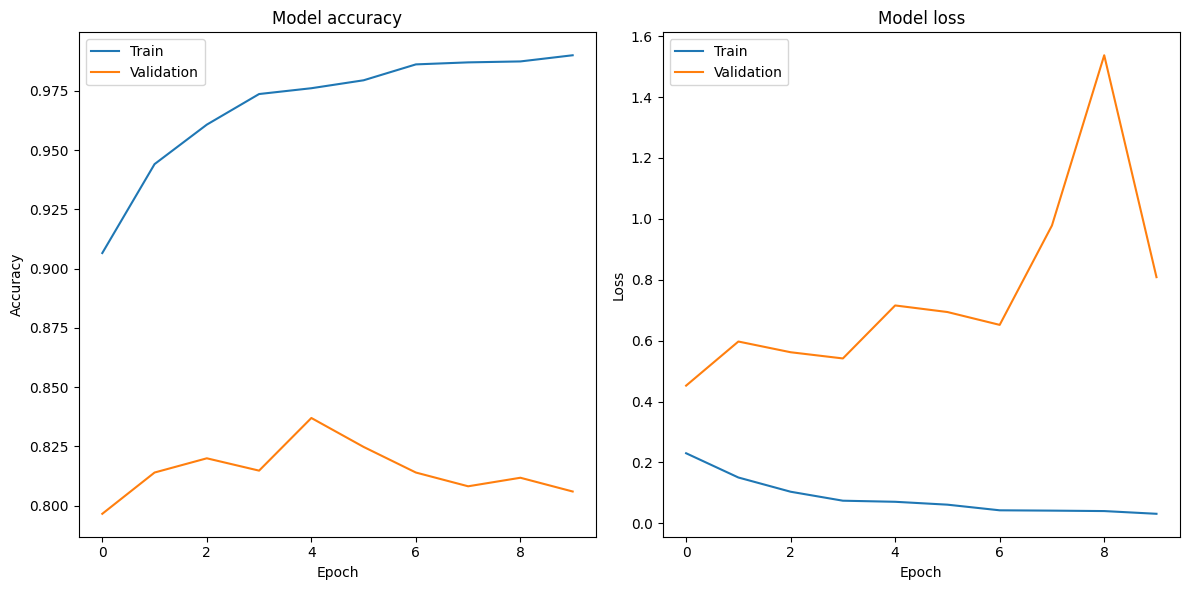

In [47]:
import matplotlib.pyplot as plt

# Assuming you have the training history stored in 'history' variable
# history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [53]:
model.save('CNN_dog_vs_cat_identification.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 141ms/step


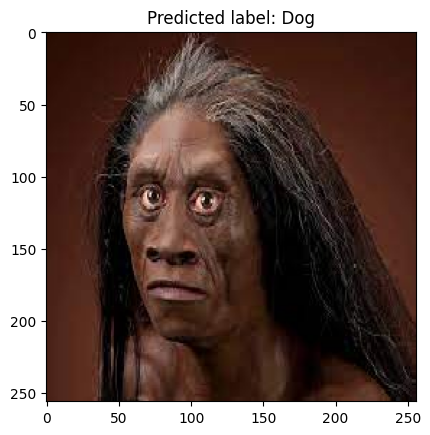

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load your trained model
# Replace 'model.h5' with the actual path to your trained model file
model = tf.keras.models.load_model('CNN_dog_vs_cat_identification.h5')

# Function to preprocess an image and make a prediction
def predict_image(image_path):
    # Load the image and preprocess it
    img = image.load_img(image_path, target_size=(image_height, image_width))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    # Predict the class probabilities
    predictions = model.predict(img)

    # If binary classification (dog vs. cat)
    predicted_label = "Dog" if predictions[0][0] > 0.5 else "Cat"

    # Show the image and prediction
    plt.imshow(image.load_img(image_path, target_size=(image_height, image_width)))
    plt.title(f"Predicted label: {predicted_label}")
    plt.show()

# Provide a path to the image you want to predict
# Replace 'path_to_image.jpg' with the actual path to your image file
image_path = '/content/drive/MyDrive/Untitled.jpg'

# Predict the image
predict_image(image_path)
